In [1]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

def print_dict_structure(data_dict, level=0):
    indent = '  ' * level
    for key, value in data_dict.items():
        if isinstance(value, dict):
            print(f"{indent}{key}:")
            print_dict_structure(value, level + 1)
        else:
            first_element = next(iter(value), None)
            print(f"{indent}{key}: (Length: {len(value)}, Data type: {type(first_element)})")

file_path = 'log_data.npy'
data = np.load(file_path, allow_pickle=True)

# Check if the loaded data is a dictionary
if isinstance(data.item(), dict):
    data_dict = data.item()

    # Print the structure of the dictionary
    print("Structure of the dictionary:")
    print_dict_structure(data_dict)
else:
    print("The loaded data is not a dictionary.")
    
#progressive_extended2没有中断，progressive_concave没有中断，ground_progressive没有中断
#progressive_convex没有中断，progressive_extended没有中断
#progressive有中断，数据不全，unprogressive有中断，ground有中断

Structure of the dictionary:
unprogressive:
  logs10:
    train: (Length: 250, Data type: <class 'str'>)
ground:
  complete-logs:
    train: (Length: 205, Data type: <class 'str'>)
    validation: (Length: 205, Data type: <class 'str'>)
ground_progressive:
  logs10:
    train: (Length: 20, Data type: <class 'str'>)
  logs4:
    train: (Length: 40, Data type: <class 'str'>)
  logs5:
    train: (Length: 40, Data type: <class 'str'>)
  logs2:
    train: (Length: 40, Data type: <class 'str'>)
  logs6:
    train: (Length: 32, Data type: <class 'str'>)
  logs1:
    train: (Length: 20, Data type: <class 'str'>)
  logs9:
    train: (Length: 20, Data type: <class 'str'>)
  logs3:
    train: (Length: 40, Data type: <class 'str'>)
  logs8:
    train: (Length: 20, Data type: <class 'str'>)
  logs7:
    train: (Length: 20, Data type: <class 'str'>)
progressive_extended2:
  logs10:
    train: (Length: 20, Data type: <class 'str'>)
    validation: (Length: 20, Data type: <class 'str'>)
  logs4:
    t

In [2]:
def plot_logs(data_dict, dict_name, log_name, log_type):
    df = data_dict[dict_name][log_name][log_type]
    df = df.sort_values(by="walltime")
    df['walltime'] = df['walltime'].apply(lambda x: time.ctime(x))
    df = filterRows(df)
    return df

In [3]:
data_dict['ground']['complete-logs']['train'][:80]

,epoch_loss,epoch_acc,epoch_top2_acc,epoch_top3_acc,epoch_top5_acc,epoch_learning_rate,step,walltime
0,4.754767,0.095703,0.214844,0.297852,0.498047,0.000003,0,1.678709e+09
1,4.650419,0.099609,0.239258,0.323242,0.516602,0.000006,1,1.678709e+09
2,4.721950,0.094727,0.208984,0.308594,0.513672,0.000010,2,1.678709e+09
3,4.666821,0.088867,0.169922,0.283203,0.491211,0.000013,3,1.678709e+09
4,4.349772,0.124023,0.245117,0.350586,0.537109,0.000016,4,1.678709e+09
...,...,...,...,...,...,...,...,...
75,0.856930,0.698635,0.823682,0.883403,0.945211,0.003515,70,1.678757e+09
76,0.856163,0.699242,0.822979,0.882868,0.945207,0.003515,71,1.678757e+09
77,0.852484,0.699922,0.824658,0.883993,0.945898,0.003410,72,1.678758e+09
78,0.847677,0.702073,0.825675,0.885331,0.946447,0.003410,73,1.678758e+09


In [4]:
# Access the desired data
unprogressive_train_df = data_dict['unprogressive']['logs10']['train']
unprogressive_train_df = unprogressive_train_df.sort_values(by="walltime")
unprogressive_train_df['walltime'] = unprogressive_train_df['walltime'].apply(lambda x: time.ctime(x))

ground_train_df = data_dict['ground']['complete-logs']['train']
ground_train_df  = ground_train_df.sort_values(by="walltime")
ground_train_df['walltime'] = ground_train_df['walltime'].apply(lambda x: time.ctime(x))

ground_val_df = data_dict['ground']['complete-logs']['validation']
ground_val_df  = ground_val_df.sort_values(by="walltime")
ground_val_df['walltime'] = ground_val_df['walltime'].apply(lambda x: time.ctime(x))

# def filterRows(df):
#     # Assuming the data is stored in a DataFrame called 'df'
#     filtered_rows = pd.DataFrame()
#     for i in range(1, len(df)):
#         if df.loc[i, 'epoch_loss'] - df.loc[i - 1, 'epoch_loss'] > 0.1:
#             filtered_rows = df.loc[i:].copy()
#             break

#      # If filtered_rows is empty, keep the original DataFrame
#     if filtered_rows.empty:
#         filtered_rows = df.copy()
        
#     # Reset the index of the filtered DataFrame
#     filtered_rows.reset_index(drop=True, inplace=True)
    
#     return filtered_rows

#平滑：后一步比前一步loss大太多（0.1）就删除前面所有的记录，从这一步开始
def filterRows(df):
    # Assuming the data is stored in a DataFrame called 'df'
    start_index = 0
    for i in range(1, len(df)):
        if df.loc[i, 'epoch_loss'] - df.loc[i - 1, 'epoch_loss'] > 0.1:
            start_index = i

    # Slice the DataFrame from the start_index to the end
    filtered_rows = df.loc[start_index:].copy()
        
    # Reset the index of the filtered DataFrame
    filtered_rows.reset_index(drop=True, inplace=True)
    
    return filtered_rows

# Analyze the data
print("unprogressive-logs10-train Data:")
unprogressive_train_df = filterRows(unprogressive_train_df)
ground_train_df = filterRows(ground_train_df)
ground_val_df = filterRows(ground_val_df)

display(unprogressive_train_df)

unprogressive-logs10-train Data:


,epoch_loss,epoch_acc,epoch_top2_acc,epoch_top3_acc,epoch_top5_acc,epoch_learning_rate,step,walltime
0,2.097786,0.222698,0.379988,0.501471,0.690546,0.000800,0,Sat Mar 11 09:25:24 2023
1,1.744176,0.373293,0.555927,0.671118,0.821412,0.001600,1,Sat Mar 11 09:37:01 2023
2,1.502010,0.465558,0.644129,0.747235,0.870958,0.002400,2,Sat Mar 11 09:48:13 2023
3,1.336139,0.527551,0.696921,0.788848,0.895511,0.003200,3,Sat Mar 11 09:59:54 2023
4,1.220088,0.568800,0.730739,0.816046,0.910732,0.004000,4,Sat Mar 11 10:11:06 2023
...,...,...,...,...,...,...,...,...
195,0.263877,0.906060,0.945941,0.962296,0.979493,0.000361,195,Mon Mar 13 08:23:01 2023
196,0.262733,0.906397,0.946082,0.962472,0.979724,0.000350,196,Mon Mar 13 08:39:22 2023
197,0.264006,0.906215,0.946005,0.962359,0.979729,0.000350,197,Mon Mar 13 08:55:23 2023
198,0.262713,0.906761,0.946348,0.962668,0.979726,0.000350,198,Mon Mar 13 09:11:32 2023


Combining logs1...
Combining logs2...
Combining logs3...
Combining logs4...
Combining logs5...
Combining logs6...
Combining logs7...
Combining logs8...
Combining logs9...
Combining logs10...


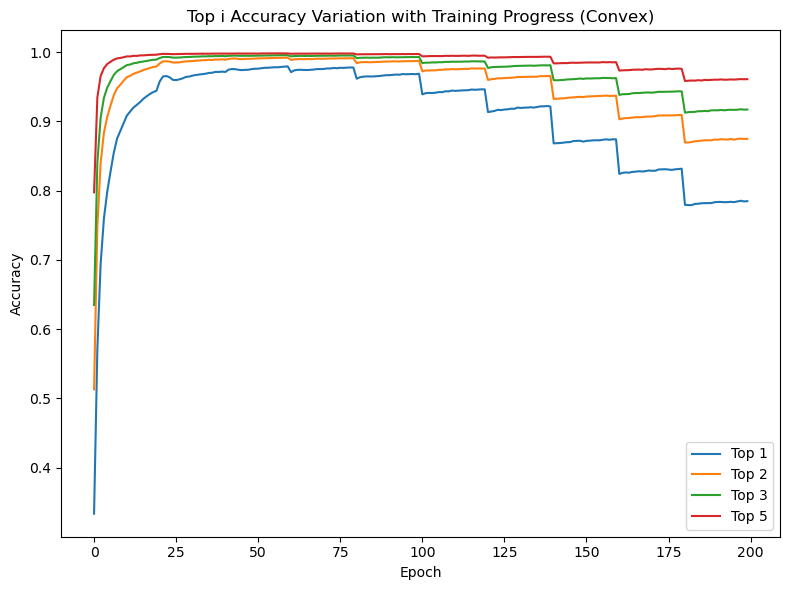

In [5]:
# convex: combine logs1 to logs10 and Replot the vali data
convex_df = pd.DataFrame()

for i in range(1, 11):
    log_name = f'logs{i}'
    print(f"Combining {log_name}...")
    df = plot_logs(data_dict, 'progressive_convex', log_name, 'train')
    convex_df = pd.concat([convex_df, df], ignore_index=True)

plt.figure(figsize=(8, 6))
# Plot the combined training DataFrame
plt.plot(convex_df['epoch_acc'], label='Top 1')
plt.plot(convex_df['epoch_top2_acc'], label='Top 2')
plt.plot(convex_df['epoch_top3_acc'], label='Top 3')
plt.plot(convex_df['epoch_top5_acc'], label='Top 5')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Top i Accuracy Variation with Training Progress (Convex)')
plt.legend()
plt.tight_layout()
plt.show()

Combining logs1...
Combining logs2...
Combining logs3...
Combining logs4...
Combining logs5...
Combining logs6...
Combining logs7...
Combining logs8...
Combining logs9...
Combining logs10...


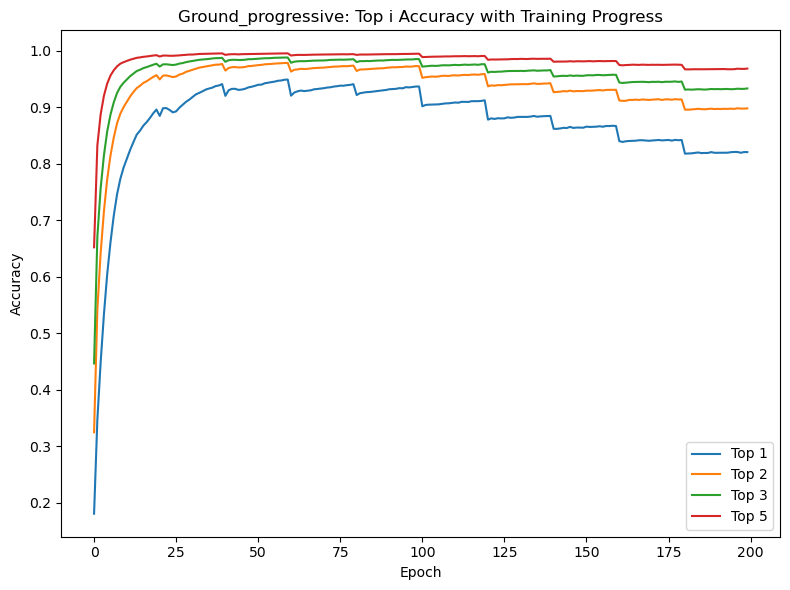

In [6]:
# Ground_progressive: combine logs1 to logs10 and Replot the vali data
ground_pro_df = pd.DataFrame()

for i in range(1, 11):
    log_name = f'logs{i}'
    print(f"Combining {log_name}...")
    df = plot_logs(data_dict, 'ground_progressive', log_name, 'train')
    ground_pro_df = pd.concat([ground_pro_df, df], ignore_index=True)

plt.figure(figsize=(8, 6))
# Plot the combined training DataFrame
plt.plot(ground_pro_df['epoch_acc'], label='Top 1')
plt.plot(ground_pro_df['epoch_top2_acc'], label='Top 2')
plt.plot(ground_pro_df['epoch_top3_acc'], label='Top 3')
plt.plot(ground_pro_df['epoch_top5_acc'], label='Top 5')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Ground_progressive: Top i Accuracy with Training Progress')
plt.legend()
plt.tight_layout()
plt.show()

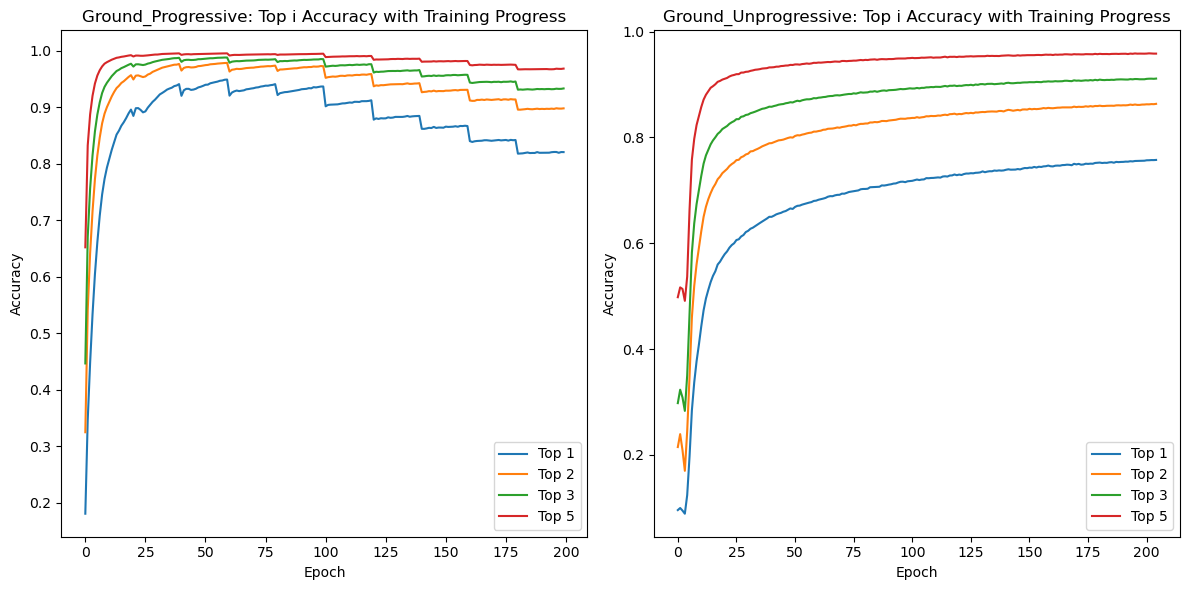

In [7]:
# Top i accuracy variation with the progress of training
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(ground_pro_df['epoch_acc'], label='Top 1')
plt.plot(ground_pro_df['epoch_top2_acc'], label='Top 2')
plt.plot(ground_pro_df['epoch_top3_acc'], label='Top 3')
plt.plot(ground_pro_df['epoch_top5_acc'], label='Top 5')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Ground_Progressive: Top i Accuracy with Training Progress')
plt.legend()
plt.subplot(122)
plt.plot(ground_train_df['epoch_acc'], label='Top 1')
plt.plot(ground_train_df['epoch_top2_acc'], label='Top 2')
plt.plot(ground_train_df['epoch_top3_acc'], label='Top 3')
plt.plot(ground_train_df['epoch_top5_acc'], label='Top 5')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Ground_Unprogressive: Top i Accuracy with Training Progress')
plt.legend()

plt.tight_layout()
plt.show()


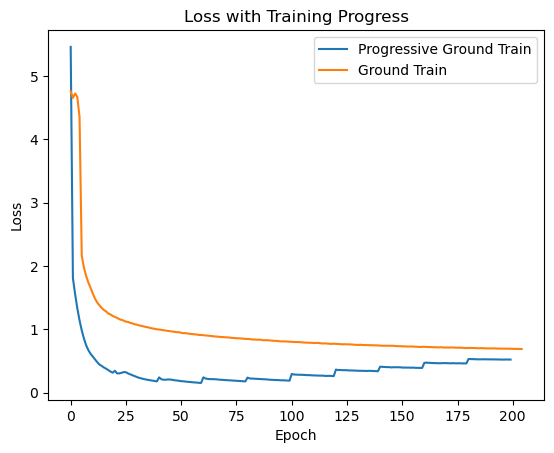

In [8]:
# Loss with the progress of training
plt.figure()
plt.plot(ground_pro_df['epoch_loss'], label='Progressive Ground Train')
plt.plot(ground_train_df['epoch_loss'], label='Ground Train')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss with Training Progress')
plt.legend()
plt.show()

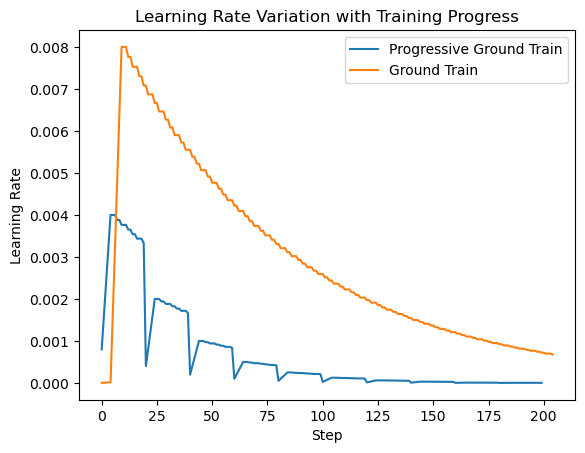

In [9]:
# Learning rate variation with the progress of steps
plt.figure()
plt.plot(ground_pro_df['epoch_learning_rate'], label='Progressive Ground Train')
plt.plot(ground_train_df['epoch_learning_rate'], label='Ground Train')
plt.xlabel('Step')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Variation with Training Progress')
plt.legend()
plt.show()

In [10]:
def plot_logs(data_dict, dict_name, log_name, log_type):
    df = data_dict[dict_name][log_name][log_type]
    df = df.sort_values(by="walltime")
    df['walltime'] = df['walltime'].apply(lambda x: time.ctime(x))
    df = filterRows(df)
    return df

Combining logs1...
Combining logs2...
Combining logs3...
Combining logs4...
Combining logs5...
Combining logs6...
Combining logs7...
Combining logs8...
Combining logs9...
Combining logs10...
Combining logs1...
Combining logs2...
Combining logs3...
Combining logs4...
Combining logs5...
Combining logs6...
Combining logs7...
Combining logs8...
Combining logs9...
Combining logs10...


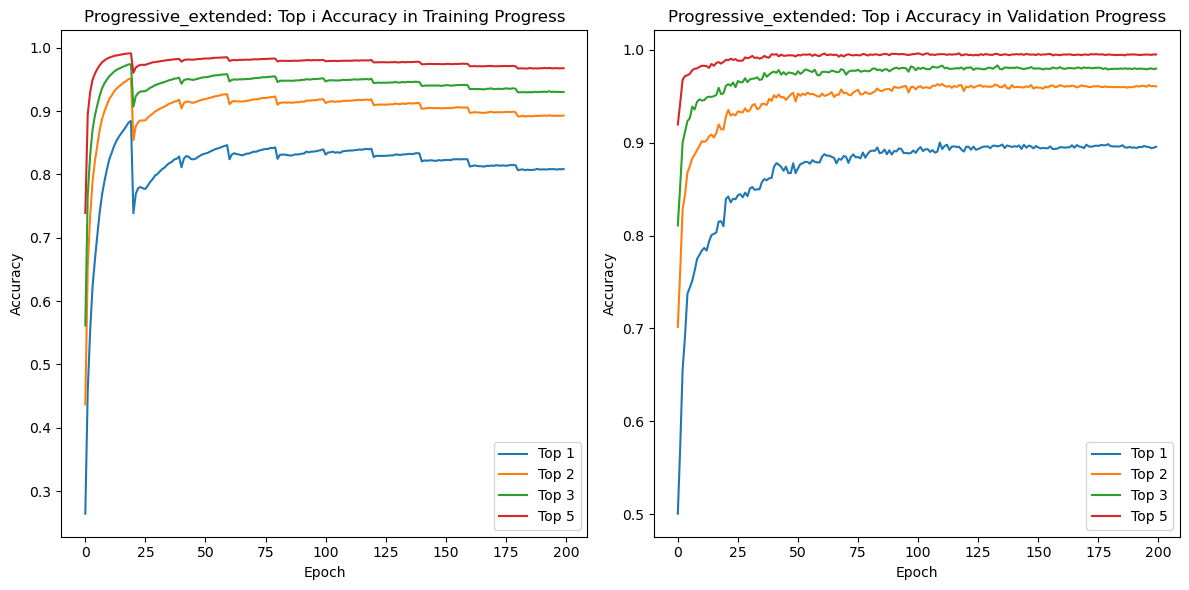

In [11]:
# progressive_extended: Combine logs1 to logs10 and Rplot the training data
combined_df = pd.DataFrame()

for i in range(1, 11):
    log_name = f'logs{i}'
    print(f"Combining {log_name}...")
    df = plot_logs(data_dict, 'progressive_extended', log_name, 'train')
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# # Sort the combined DataFrame by wall time
# combined_df = combined_df.sort_values(by="walltime")
# # Apply filterRows to the combined DataFrame
# combined_df = filterRows(combined_df)
# Combine logs1 to logs10 and Rplot the vali data
combined1_df = pd.DataFrame()

for i in range(1, 11):
    log_name = f'logs{i}'
    print(f"Combining {log_name}...")
    df = plot_logs(data_dict, 'progressive_extended', log_name, 'validation')
    combined1_df = pd.concat([combined1_df, df], ignore_index=True)

#图不太对劲就拼接完再做一次平滑
# Sort the combined DataFrame by wall time
combined1_df = combined1_df.sort_values(by="walltime")
# Apply filterRows to the combined DataFrame
combined1_df = filterRows(combined1_df)

plt.figure(figsize=(12, 6))
plt.subplot(121)
# Plot the combined training DataFrame
plt.plot(combined_df['epoch_acc'], label='Top 1')
plt.plot(combined_df['epoch_top2_acc'], label='Top 2')
plt.plot(combined_df['epoch_top3_acc'], label='Top 3')
plt.plot(combined_df['epoch_top5_acc'], label='Top 5')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Progressive_extended: Top i Accuracy in Training Progress')
plt.legend()

plt.subplot(122)
# Plot the combined validation DataFrame
plt.plot(combined1_df['epoch_acc'], label='Top 1')
plt.plot(combined1_df['epoch_top2_acc'], label='Top 2')
plt.plot(combined1_df['epoch_top3_acc'], label='Top 3')
plt.plot(combined1_df['epoch_top5_acc'], label='Top 5')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Progressive_extended: Top i Accuracy in Validation Progress')
plt.legend()
plt.tight_layout()
plt.show()

Combining logs1...
Combining logs2...
Combining logs3...
Combining logs4...
Combining logs5...
Combining logs6...
Combining logs7...
Combining logs8...
Combining logs9...
Combining logs10...
Combining logs1...
Combining logs2...
Combining logs3...
Combining logs4...
Combining logs5...
Combining logs6...
Combining logs7...
Combining logs8...
Combining logs9...
Combining logs10...


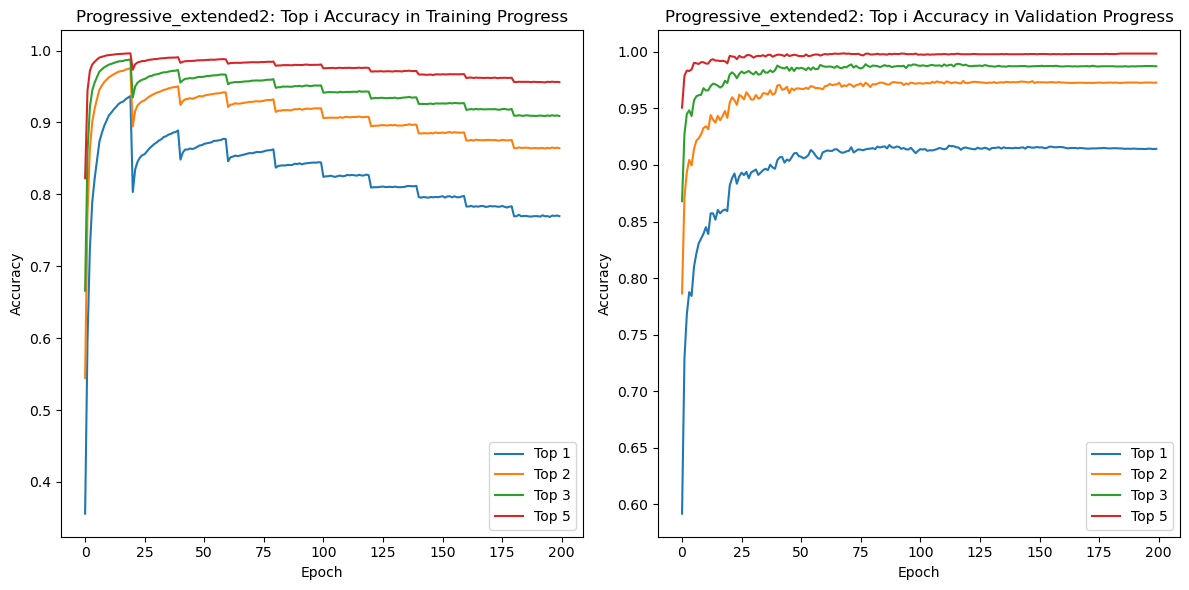

In [12]:
# progressive_extended2: Combine logs1 to logs10 and Rplot the training data
combined_df = pd.DataFrame()

for i in range(1, 11):
    log_name = f'logs{i}'
    print(f"Combining {log_name}...")
    df = plot_logs(data_dict, 'progressive_extended2', log_name, 'train')
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Combine logs1 to logs10 and Rplot the vali data
combined1_df = pd.DataFrame()

for i in range(1, 11):
    log_name = f'logs{i}'
    print(f"Combining {log_name}...")
    df = plot_logs(data_dict, 'progressive_extended2', log_name, 'validation')
    combined1_df = pd.concat([combined1_df, df], ignore_index=True)

plt.figure(figsize=(12, 6))
plt.subplot(121)
# Plot the combined training DataFrame
plt.plot(combined_df['epoch_acc'], label='Top 1')
plt.plot(combined_df['epoch_top2_acc'], label='Top 2')
plt.plot(combined_df['epoch_top3_acc'], label='Top 3')
plt.plot(combined_df['epoch_top5_acc'], label='Top 5')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Progressive_extended2: Top i Accuracy in Training Progress')
plt.legend()

plt.subplot(122)
# Plot the combined validation DataFrame
plt.plot(combined1_df['epoch_acc'], label='Top 1')
plt.plot(combined1_df['epoch_top2_acc'], label='Top 2')
plt.plot(combined1_df['epoch_top3_acc'], label='Top 3')
plt.plot(combined1_df['epoch_top5_acc'], label='Top 5')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Progressive_extended2: Top i Accuracy in Validation Progress')
plt.legend()
plt.tight_layout()
plt.show()